# Svet Superjunakov Stan Leeja

## Projektna naloga pri predmetu Programiranje 1
## Avtor: Nejc Zajc

V tej datoteki analiziram zbrane in urejene podatke glede ustvarjenih likov Stana Leeja pri Marvel stripih.

## UVOD

Pri projektni nalogi analize podatkov sem si ogledal like, ki jih je v svoji bogati karieri ustvaril oziroma pomagal ustvariti leta 2018 preminuli **Stan Lee**. Stan Lee je bil eden izmed največjih ustvarjalcev stripov na svetu, like pa je ustvarjal pod znamko *Marvel Comics*.

Ob vseh dogodkih, ki so obkrožali Marvel v lanskem letu, sem se odločil še iz malo druge plati pogledati na superjunake njihovega velikega vesolja.

Iz spletne baze podatkov o [Marvelovih likih](https://marvel.fandom.com/wiki/Marvel_Database) sem pobral podatke o likih Stan Leeja, kot sem to opisal v *README.md*, v tej datoteki pa zbrane podatke raziščem.

## 0. Priprava
Najprej naložim pakete in shranim podatke v spremenljivke. Prav tako nastavim nekaj osnovnih nastavitev za uporabljanje *Jupyter Notebooka*.

In [580]:
# naložim paketa, s katerimi obdelujem podatke
import pandas as pd
import numpy as np

# zaradi preglednosti v tabelah izpisujem le 20 vrstic
pd.options.display.max_rows = 20

# izberem stil grafov
%matplotlib notebook

# naložim še podatke, s katerimi delam, ker imam vse podatke urejene po "id"-ju, ki je enak končnici spletne strani, 
# na kateri se nahaja lik, vrstic v tabelah ni potrebno dodatno številčiti
podatki = pd.read_csv('podatki/podatki.csv', index_col = "id")
avtorji = pd.read_csv('podatki/avtorji.csv', index_col = "id")
moci = pd.read_csv('podatki/moci.csv', index_col = "id")
tabele = pd.read_csv('podatki/tabele.csv', index_col = "id")

Najprej pogledam koliko in katere podatke imam.

In [581]:
podatki.groupby("tip").count()

,naziv,pravo_ime,vesolje,razmerje,naslov,izdaja,leto,mesec
tip,,,,,,,,
Character,1691,1681,1691,759,1691,1666,1688,1578
Item,0,0,0,0,173,172,173,173
Location,0,0,0,0,172,172,172,172
Organization,0,0,0,0,6,6,6,6
Race,0,0,0,0,102,102,102,101
Team,0,0,0,0,66,66,66,65


Vse podatke sem zbral le za osebe, zato se bom v drugem delu analize posvetil le njim.

Podatke glede stripov, ko se je lik pojavil prvič in podatke o avtorjih (shranjeni v *avtorji*) pa sem zbral za vse vnose. Na začetku se bom tako posvetil splošni analizi.

# 1. Prve pojavitve likov

V **prvem delu** naloge si ogledam, kaj lahko ugotovim glede stripov v katerih je Stan Lee prvič omenil like.

# 1.1. Najbolj aktivna leta

Stanley Martin Lieber je živel med lei 1922 in 2018. Najprej si pogledam v katerih letih, je svetu predstavil največ likov.

<IPython.core.display.Javascript object>


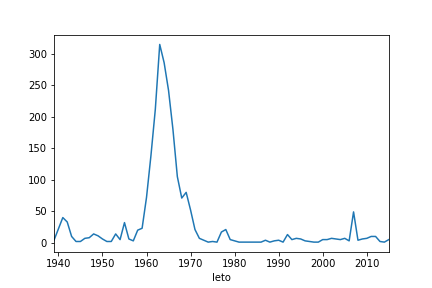

In [582]:
podatki.groupby("leto").size().plot()

In [583]:
podatki.groupby("naslov").size().sort_values(ascending = False).head(1) # = "Fantastic Four"
podatki[podatki.naslov == "Fantastic Four"].groupby("leto").size()

leto
1961.0    13
1962.0    33
1963.0    58
1964.0    17
1965.0    21
1966.0    41
1967.0    14
1968.0     8
1969.0    23
1970.0    14
1971.0     6
1972.0     1
dtype: int64

Vidim, da je v šestdesetih letih - ko je napisal med drugim tudi *Fanstatične štiri* - napisal daleč največ novih likov. Takrat je njegova popularnost eksplodirala, prav tako pa je pomagal k vzponu Marvela, ki so ga poimenovali kar **Marvel revolution**

# 1.2. Izdaje v seriji & meseci

In [584]:
st_zbranih_izdaj = podatki.groupby("izdaja").size().sum() # 2236 - za toliko likov sem zbral izdajo
v_prvih = podatki[podatki.izdaja == 1].shape[0] # 233 - število likov v prvih delih serij
v_prvih / st_zbranih_izdaj

0.10420393559928444

In [585]:
podatki[podatki.izdaja < 1900].groupby("izdaja").size().tail(20) # opazim nekaj primerov izdaj nad 500!
podatki[(podatki.izdaja > 500) & (podatki.izdaja < 1900)]

,tip,naziv,pravo_ime,vesolje,razmerje,naslov,izdaja,leto,mesec
id,,,,,,,,,
Gray_Madder_(Earth-616),Character,Gray Madder,Gray Madder,Earth-616,NaN,Amazing Spider-Man,600.0,2009.0,September
Loki_Laufeyson_(Kid_Loki)_(Earth-616),Character,Loki,Loki Laufeyson,Earth-616,Single,Thor,617.0,2011.0,January
Timmy_Carter_(Earth-616),Character,Timmy Carter,Timmy Carter,Earth-616,Single,Thor,600.0,2009.0,April


Nepresenetljivo se je največ predstavitev likov zgodilo v prvih delih serij stripov. To pa se vseeno ni zgodilo tako pogosto, kot bi pričakoval. Nov lik se je prvič pojavil v prvem delu namreč le v dobrih 10 % primerov.

Zanimalo me je še, katera je bila najvišja izdaja, v kateri je bil predstavljen lik. Ko iz izbora odstranim strip z naslovom *Spider-Man Newspaper Strips*, ki je številčil izdaje po letih, ko je izšel, sem vseeno presenečen nad rezultati. Stripa *Amazing Spider-Man* in *Thor* sta celo po svoji 500. izdaji še vedno predstavljala nove like.

Pogledam si še kako na število novih likov vpliva del leta.

<IPython.core.display.Javascript object>


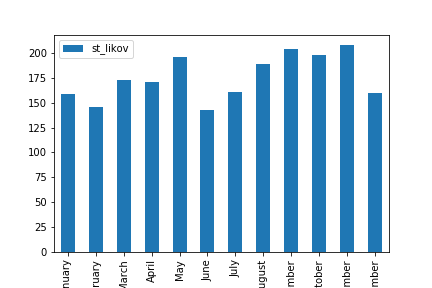

In [586]:
#pd.options.mode.chained_assignment = warn  # default='warn'

pogledam_po_mesecih = podatki[(podatki.mesec != "Spring") & (podatki.mesec != "Summer") & 
                      (podatki.mesec != "Fall") & (podatki.mesec != "Winter")]
meseci = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
pogledam_po_mesecih['mesec'] = pd.Categorical(pogledam_po_mesecih['mesec'], categories=meseci, ordered=True)
pogledam_po_mesecih.groupby("mesec").size().to_frame("st_likov").plot.bar()


Opazim višek v drugi polovici leta, natančneje v začetku šolskega in študijskega leta.

# 2. Vesolja & sodelavci

V *Marvel Comics Multiverse* (vesolju Marvelovih stripov) glavno Zemljo imenujejo **Earth-616**. Posledično se večino dogajanja dogaja tam, prav tako se tam pojavlja največ likov.

Kaj pa ostale Zemlje? Ali  je Stan Lee s katerim izmed sodelavcev sodeloval večinoma *na drugi Zemlji*?

Ker podatkov za vesolja nisem zbiral za like, ki niso osebe, se sedaj omejim samo na te.

In [587]:
osebe = podatki[podatki.tip == "Character"]
avtorji.groupby("avtor").size().sort_values(ascending = False)

avtor
Jack Kirby        1005
Steve Ditko        236
Larry Lieber       219
Don Heck           133
Gene Colan          83
                  ... 
Paul Laiken          1
Jackson Guice        1
James Shooter        1
Jamie McKelvie       1
Gary Friedrich       1
Length: 163, dtype: int64

In [588]:
osebe.groupby("vesolje").size().sort_values(ascending = False).head(10)

vesolje
Earth-616      1467
Earth-77013     101
Earth-71016      31
Earth-928        11
Earth-78909      10
Earth-6311        9
Earth-70813       7
Earth-1102        7
Earth-92131       6
Earth-665         6
dtype: int64

Najprej sem se prepričal o predpostavkah, da je glavna Zemlja res najpogostejša in da je Stan Lee sodeloval največkrat s Jackom Kirbyjem.

Zdaj raziščem še sodelovanja glede na svetove.

In [589]:
skupni = pd.merge(osebe, avtorji, left_on="id", right_on="id") # združim tabeli

po_avtorjih = avtorji.groupby("avtor").size().to_frame("st_sodelovanj")                  # spremenim v tabelo, za lepši prikaz
po_avtorjih["Earth-616"] = skupni[skupni.vesolje == "Earth-616"].groupby("avtor").size() # dodam koliko likov iz glavne Zemlje
po_avtorjih["delez"] = po_avtorjih["Earth-616"] / po_avtorjih.st_sodelovanj              # ter še stolpec, z deležem le-teh

po_avtorjih.sort_values("delez").dropna() # za prikaz izpustim tiste, ki niso nikoli sodelovali z likom iz glavne Zemlje

,st_sodelovanj,Earth-616,delez
avtor,,,
John Romita Jr.,32,1.0,0.031250
Marie Severin,16,5.0,0.312500
Archie Goodwin,3,1.0,0.333333
Larry Lieber,219,84.0,0.383562
John Romita,46,19.0,0.413043
...,...,...,...
Gil Kane,2,2.0,1.000000
Gerry Conway,7,7.0,1.000000
Gary Friedrich,1,1.0,1.000000


In [590]:
skupni[skupni.avtor == "John Romita Jr."]

,tip,naziv,pravo_ime,vesolje,razmerje,naslov,izdaja,leto,mesec,avtor
id,,,,,,,,,,
Adjudicator_(Earth-71016),Character,Adjudicator,Unknown,Earth-71016,NaN,The Last Fantastic Four Story,1.0,2007.0,October,John Romita Jr.
Alicia_Masters_(Earth-71016),Character,Alicia Masters,Alicia Masters,Earth-71016,NaN,The Last Fantastic Four Story,1.0,2007.0,October,John Romita Jr.
Anthony_Stark_(Earth-71016),Character,Iron Man,Anthony Edward Stark,Earth-71016,Single,The Last Fantastic Four Story,1.0,2007.0,October,John Romita Jr.
Benjamin_Grimm_(Earth-71016),Character,Thing,Benjamin Jacob Grimm,Earth-71016,Single,The Last Fantastic Four Story,1.0,2007.0,October,John Romita Jr.
Blackagar_Boltagon_(Earth-71016),Character,Black Bolt,Blackagar Boltagon,Earth-71016,Married,The Last Fantastic Four Story,1.0,2007.0,October,John Romita Jr.
...,...,...,...,...,...,...,...,...,...,...
T%27Challa_(Earth-71016),Character,Black Panther,T'Challa,Earth-71016,NaN,The Last Fantastic Four Story,1.0,2007.0,October,John Romita Jr.
Thor_Odinson_(Earth-71016),Character,Thor,Thor Odinson,Earth-71016,Single,The Last Fantastic Four Story,1.0,2007.0,October,John Romita Jr.
Triton_(Earth-71016),Character,Triton,Triton,Earth-71016,Single,The Last Fantastic Four Story,1.0,2007.0,October,John Romita Jr.


In [591]:
skupni[skupni.avtor == "Larry Lieber"].groupby("vesolje").size()

vesolje
Earth-616       84
Earth-6212       2
Earth-62935      1
Earth-63157      1
Earth-77013     75
Earth-TRN148     1
Earth-TRN597     1
dtype: int64

Tako sem našel sodelavnca *John Romita Jr.*-ja, ki je skoraj izključno sodeloval s Stan Leejem na projektu, ki se ni dogajal na glavni Zemlji. Ob pogledu na njune skupne projekte se izkaže, da je bil skupni projekt (na ostalih Zemljah) le en, a je ta prispeval veliko novih oseb. Te osebe so velika imena likov, a ker se strip dogaja na tuji Zemlji, sta jih tako skupaj predstavila svetu.

Drugi izstopajoči je *Larry Lieber* (Stanov brat), ki pa je navlkjub manjhnemu deležu, pri več kot polovici skupnih projektov ustvaril lik iz glavne Zemlje.

*Opomba*: Pri prikazu deležev izpustim vrstice, ki nimajo podatkov za glavno Zemljo, do česar lahko pride tudi v primeru, ko za skupni lik ni podatka o vesolju (ne le v primeru, ko noben izmed skupnih likov ni iz glavne Zemlje).

# 3. Osebe

Sedaj se še malo bolj podrobno spustim v podatke zbrane za osebe.

# 3.1. Status razmerja

Za osebe sem zbiral tudi podatke o stanju njihovj razmerij.

In [592]:
osebe.groupby("razmerje").size()

razmerje
Divorced      38
Engaged        4
Married      173
Separated     14
Single       474
Widowed       56
dtype: int64

Opazim, da je največ oseb samskih. Poleg tistih v razmerju pa jih je kar nekaj tudi takšnih, ki so bili v razmerju, a so to zvezo izgubili - torej *Divorced*, *Separated* in *Widowed*.

Malo raziskovanja me pripelje do naslednje zanimive povezave.

Ločim osebe, za katere imam podatek o razmerju, na tiste, katerih naziv je enak njihovemu pravemu imenu in tiste, za katere to ne drži.

In [593]:
isto = osebe[osebe.naziv == osebe.pravo_ime].count().razmerje        # ti imajo naziv enak imenu - teh je 334
spremenjeno = osebe[osebe.naziv != osebe.pravo_ime].count().razmerje # naziv teh je drugačen   -   teh je 425
a = osebe[osebe.naziv == osebe.pravo_ime].groupby("razmerje").size() # le po istih pogledam njihova razmerja
a

razmerje
Divorced       8
Engaged        4
Married       89
Separated      5
Single       213
Widowed       15
dtype: int64

In [594]:
b = osebe[osebe.naziv != osebe.pravo_ime].groupby("razmerje").size() # enako storim za spremenjene
delez_isti = (a.Divorced + a.Separated + a.Widowed) / isto                   # izračunam delež tistih, 
delez_spremenjeno = (b.Divorced + b.Separated + b.Widowed) / spremenjeno     # ki so izgubili zvezo za obe skupini
(delez_isti, delez_spremenjeno)

(0.08383233532934131, 0.18823529411764706)

Osebe, ki si za naziv izberejo ime, ki ni njihovo pravo, so torej kar precej manj uspešne v ohranjanju razmerij.

# 3.2. Najmočnejše osebe

V tem delu si pogledam moči, ki jih imajo zbrane osebe.

In [595]:
moci.groupby("moc").size().sort_values()

moc
Absorb Information              1
Mutant detection                1
Mutated Pheromone               1
Superhumanly Durability         1
Mystic Portals                  1
                               ..
Regenerative Healing Factor    53
Superhuman Speed               62
Superhuman Stamina             75
Superhuman Durability          84
Superhuman Strength            99
Length: 779, dtype: int64

In [596]:
moci_po_osebah = moci.groupby("id").size().to_frame("st_moci")
moci_po_osebah.sort_values("st_moci")

,st_moci
id,
Victoria_Bentley_(Earth-616),1
Geirrodur_(Earth-616),1
Galaxy_Master_(Earth-616),1
Maris_Morlak_(Earth-616),1
Martin_Blank_(Earth-616),1
...,...
Amora_(Earth-616),28
Stephen_Strange_(Earth-616),29
Franklin_Richards_(Earth-616),29


Kot pričakovano, so najpogostejše moči nadčloveška fizična moč, hitrost, odpornost in podobne.

Izmed oseb je glede na različne moči najmočnejša *Jean Grey*, ki je *Omega Level Mutant*. Skupaj z *Adamom Warlockom* ima precej več moči kot ostali, kar kaže na njuno premoč glede raznolikosti moči.

Za osebe sem zbiral tudi tabele ocen njihove moči po področjih. Vsaka tabela vsebuje oceno od 1 (najšibkejše) do 7 (najmočnejše) za področja: *INT* - inteligenca, *STR* - moč, *SPD* - hitrost, *DUR* - vzdržljivost, *ENP* - sproščanje energije in *FGT* - spretnost pretepanja.

Tabeli dodam stolpec vsote vseh 6 ocen, in tako dobim še eno lestvico oseb po njihovi moči.

In [597]:
tabele["SUM"] = tabele.INT + tabele.STR + tabele.SPD + tabele.DUR + tabele.ENP + tabele.FGT
tabele.sort_values("SUM")

,INT,STR,SPD,DUR,ENP,FGT,SUM
id,,,,,,,
Boris_(Latverian)_(Earth-616),2,1,2,2,1,1,9
Benjamin_Parker_(Earth-616),2,1,2,2,1,1,9
Anna_May_(Earth-616),2,1,2,2,1,1,9
William_Lumpkin_(Earth-616),2,2,2,2,1,1,10
Sally_Avril_(Earth-616),2,2,2,2,1,1,10
...,...,...,...,...,...,...,...
Infinity_(Earth-616),7,7,7,7,7,2,37
Super-Adaptoid_(Earth-616),2,7,7,7,7,7,37
Mephisto_(Earth-616),7,7,7,7,7,2,37


In [598]:
tabele.mean().sort_values()

FGT     3.060453
ENP     3.095718
SPD     3.206549
INT     3.211587
STR     3.556675
DUR     3.775819
SUM    19.906801
dtype: float64

Lestvica pri vrhu ni podobna prejšnji, opazim pa da tu ni oseb, ki bi močno izstopale.
Popolnega rezultata (42 točk) ni, če pa gledam vsote brez enega izmed stolpcev, dobim ko izspustim spretnost pretepanja kar 7 polnih vsot - tu najdem kozmična bitja izjemnih razsežnosti po moči, ki ne potrebujejo navadnega pretepanja. Edini drugi primer vsote 35 točk po petih stoplcih se zgodi ob izpuščeni inteligenci pri *Super Adaptoidu* - super-robotu, ki kopira druge osebe ter jnihove moči.

Da mnogi junaki niso odvisni le od pretepanja kaže tudi najmanjša povprečna vrednost pri tej lastnosti.

In [599]:
tabele.loc["Jean_Grey_(Earth-616)"]

INT     3
STR     2
SPD     7
DUR     7
ENP     7
FGT     4
SUM    30
Name: Jean_Grey_(Earth-616), dtype: int64

In [600]:
moci.loc["Dormammu_(Earth-616)"]

,moc
id,
Dormammu_(Earth-616),Sorcery over the Flames of the Faltine
Dormammu_(Earth-616),Banishment
Dormammu_(Earth-616),Superhuman Strength
Dormammu_(Earth-616),Astral Projection
Dormammu_(Earth-616),Matter Transmutations
Dormammu_(Earth-616),Inter-dimensional Teleportation/Transportation
Dormammu_(Earth-616),High-Speed Flight
Dormammu_(Earth-616),Transformations
Dormammu_(Earth-616),Elemental Control


Oba "najmočnejša" na lestvicah sta iz drugega vidika sicer nadpovprečna, a ne povsem pri vrhu.

Zato poskusim ugotoviti, koliko imata lestvici sploh skupnega.

<IPython.core.display.Javascript object>


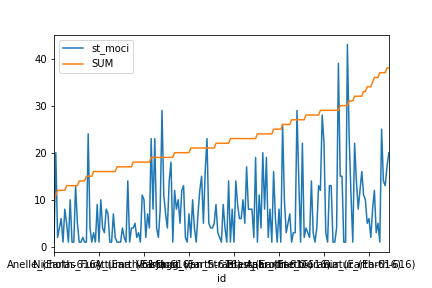

In [601]:
zdruzeni = pd.merge(moci_po_osebah, tabele[["SUM"]], left_on = "id", right_on = "id") 
# naredim tabelo z dvema stolpcema obeh lestvic
zdruzeni.sort_values("SUM").plot()  # narisem graf, na x-osi so osebe

V grafu sem po velikosti uredil vsoto točk v tabeli. Glede tega ali število različnih moči narašča je težko veliko reči. Zato združim podatke in pogledam ali po manjših skupinah povprečno število moči narašča.

*Zdruzenim* osebam pripišem vrednost vsote v tabeli zaokrožene na 4 (za natančnejšo zaokrožitev, pred računanjem celega dela prištejem 1). Po tako ustvarjenih razredih sedaj pogledam ali narašča povprečno število različnih moči znotraj razreda.

<IPython.core.display.Javascript object>


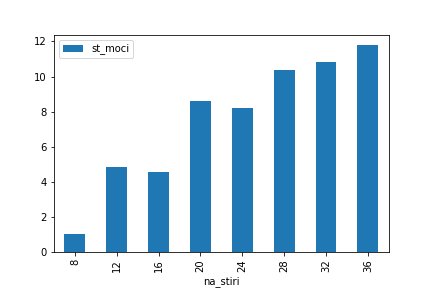

In [602]:
zdruzeni["na_stiri"] = 4 * ((zdruzeni.SUM + 1) // 4)
na_stiri = zdruzeni.groupby("na_stiri")
na_stiri.mean()[["st_moci"]].plot.bar()

Sedaj se lepo vidi, da sta lestvici povezani, saj povprečno število moči očitno narašča z zaokroženo vsoto v tabeli.

# 3.3. Avtorji & število moči

Zanima me še, ali je kateri izmed sodelavcev ustvarjal nad- ali podpovprečno močne osebe. Tega vprašanja se lotim s primerjanjem povprečnega števila moči gelde na avtorja, omejim pa se le na takšne, ki so s Stan Leejem sodelovali najpogosteje.

In [603]:
moci_po_a = pd.merge(avtorji, moci_po_osebah, left_on = "id", right_on = "id").groupby("avtor").mean().sort_values("st_moci")
# zdruzim tabelo avtorjev in moči po osebah, in tako dobim tabelo oseb z dodanim stolpcem "st_moci",
# to nato uredim po skupinah po avtorju ter izračunam povprečno število moči

pogosti = avtorji.groupby("avtor").size().sort_values().tail(10).to_frame("zadetki") 
# naredim si stolpec 10 najbolj pogostih sodelovanj Stan Leeja

pd.merge(moci_po_a, pogosti, right_on = "avtor", left_on = "avtor").sort_values("zadetki")

,st_moci,zadetki
avtor,,
Robert Bernstein,5.000000,37
John Buscema,4.461538,59
Dick Ayers,1.428571,66
Gene Colan,5.333333,83
Don Heck,3.153846,133
Larry Lieber,6.200000,219
Steve Ditko,9.000000,236
Jack Kirby,6.706250,1005


Ugotovim torej, da je med pogostimi sodelavci Stan Leeja najmočnejše osebe ustvarjal *Steve Ditko*. Izrazito šibke pa so bile osebe *Dicka Ayersa*.

# 4. Marvel's Avengers

V zadnjem delu naloge, si ogledam kako močni so najbolj slavni junaki iz filmov zadnjih let.
Pogledam torej 6 članov *Maščevalcev* iz filma [The Avengers](https://www.imdb.com/title/tt0848228/).

Pogledam njihove zadetke in izberem verzije iz glavne Zemlje.
Tabeli dodam ocene iz tabele in nato pogledam ugotovitve.

In [604]:
podatki[podatki.naziv == "Spider-Man"]
podatki[podatki.naziv == "Iron Man"]
podatki[podatki.naziv == "Hulk"]
podatki[podatki.naziv == "Black Widow"]
podatki[podatki.naziv == "Hawkeye"]
podatki[podatki.naziv == "Thor"]
avengers = podatki.loc[["Thor_Odinson_(Earth-616)", "Clinton_Barton_(Earth-616)", "Natalia_Romanova_(Earth-616)", 
                        "Bruce_Banner_(Earth-616)", "Anthony_Stark_(Earth-616)", "Peter_Parker_(Earth-616)"]]
pd.merge(avengers, tabele, left_on = "id", right_on = "id")

,tip,naziv,pravo_ime,vesolje,razmerje,naslov,izdaja,leto,mesec,INT,STR,SPD,DUR,ENP,FGT,SUM
id,,,,,,,,,,,,,,,,
Thor_Odinson_(Earth-616),Character,Thor,Thor Odinson,Earth-616,Single,Venus,11.0,1950.0,November,2,7,7,6,6,4,32
Clinton_Barton_(Earth-616),Character,Hawkeye,"Clinton Francis ""Clint"" Barton",Earth-616,Divorced,Tales of Suspense,57.0,1964.0,September,3,2,2,2,1,6,16
Natalia_Romanova_(Earth-616),Character,Black Widow,Natalia Alianovna Romanova (birth name) Natali...,Earth-616,Widowed,Tales of Suspense,52.0,1964.0,April,3,3,2,3,3,6,20
Bruce_Banner_(Earth-616),Character,Hulk,Robert Bruce Banner,Earth-616,Married,Incredible Hulk,1.0,1962.0,May,6,7,3,7,5,4,32
Anthony_Stark_(Earth-616),Character,Iron Man,"Anthony Edward ""Tony"" Stark",Earth-616,Single,Tales of Suspense,39.0,1963.0,March,6,6,5,6,6,4,33
Peter_Parker_(Earth-616),Character,Spider-Man,Peter Benjamin Parker,Earth-616,Single,Amazing Fantasy,15.0,1962.0,August,4,4,3,3,1,4,19


Glede na ocene iz tabele sta v šibkejšem delu ekipe *Black Widow* in *Hawkeye*, saj sta "le navadna" človeka. Prav tako se med šibkejšimi znajde *Spider-Man*.

Pričakovano sta najpametnejša člana zasedbe znastvenika *Tony Stark* in *Bruce Banner*, najmočnejša pa *Thor* in *Hulk*.